In [3]:
from urllib import request
import json
import time
import pandas as pd
from random import sample

#output_file = 'stockdata.csv'
url1 = "https://financialmodelingprep.com/api/v3/company/stock/list"
url2 = "https://financialmodelingprep.com/api/v3/historical-price-full/"
with request.urlopen(url1) as res:
    data = json.load(res)
#print(data)
#symbols_list = [key['symbol'] for key in data['symbolsList']]
#print(symbols_list)

In [36]:
r50 = sample(symbols_list, 50)
print(r50)

['JHME', 'EIDO', 'HIVE', 'MJ', 'VSL', 'PPBI', 'HMNY', 'MIDZ', 'LTRPB', 'FLCH', 'BHACU', 'MAXR', 'STFC', 'IVW', 'CPTA', 'SXI', 'JJMB', 'QLD', 'IPG', 'WMIH', 'ASH', 'XLK', 'IGIH', 'EAT', 'MGRC', 'UCC', 'WBIF', 'EQR', 'TLGT', 'WVE', 'VFC', 'NFLX', 'EIV', 'UTHR', 'CBRL', 'NEBUU', 'FNTE', 'PDCO', 'DOTAR', 'IOO', 'FISV', 'GTYHU', 'VST', 'RLJE', 'TCAP', 'SPTS', 'VTV', 'NBEV', 'KRO', 'DTYL']


In [37]:
#request has one symbol only(the first from the list) to get the headers for the csv file. 
with request.urlopen(url2 + r50[0]) as res:
    data = json.load(res)
df = pd.read_json(json.dumps(data['historical']))
df.insert(0, "symbol", data['symbol'])
df['number'] = df.index+1
df = df.rename(columns = {"close": "price"})
df = df[['symbol','number','date','price']]
with open(output_file, 'w') as file:
    df.to_csv(file,index=False,line_terminator='\n',sep=';')
print(df)

    symbol  number       date    price
0     JHME       1 2016-03-29  23.2616
1     JHME       2 2016-03-30  23.5659
2     JHME       3 2016-03-31  23.5659
3     JHME       4 2016-04-01  23.3852
4     JHME       5 2016-04-04  23.3852
..     ...     ...        ...      ...
924   JHME     925 2019-12-30  22.3900
925   JHME     926 2019-12-31  23.4500
926   JHME     927 2020-01-01  23.4500
927   JHME     928 2020-01-02  23.4500
928   JHME     929 2020-01-03  23.4500

[929 rows x 4 columns]


In [39]:
#list of the request urls (just making things clear)
url_list=[]
for n in range(1,49,3):
    url_list.append(url2 + r50[n] + "," + r50[n+1] + "," + r50[n+2])
url_list.append(url2 + r50[49])
for url in url_list:
    print(url)

https://financialmodelingprep.com/api/v3/historical-price-full/EIDO,HIVE,MJ
https://financialmodelingprep.com/api/v3/historical-price-full/VSL,PPBI,HMNY
https://financialmodelingprep.com/api/v3/historical-price-full/MIDZ,LTRPB,FLCH
https://financialmodelingprep.com/api/v3/historical-price-full/BHACU,MAXR,STFC
https://financialmodelingprep.com/api/v3/historical-price-full/IVW,CPTA,SXI
https://financialmodelingprep.com/api/v3/historical-price-full/JJMB,QLD,IPG
https://financialmodelingprep.com/api/v3/historical-price-full/WMIH,ASH,XLK
https://financialmodelingprep.com/api/v3/historical-price-full/IGIH,EAT,MGRC
https://financialmodelingprep.com/api/v3/historical-price-full/UCC,WBIF,EQR
https://financialmodelingprep.com/api/v3/historical-price-full/TLGT,WVE,VFC
https://financialmodelingprep.com/api/v3/historical-price-full/NFLX,EIV,UTHR
https://financialmodelingprep.com/api/v3/historical-price-full/CBRL,NEBUU,FNTE
https://financialmodelingprep.com/api/v3/historical-price-full/PDCO,DOTAR,IO

In [41]:
for url in url_list:
    time.sleep(5) #maybe more rest time?
    with request.urlopen(url) as res:
        data = json.load(res)
        
    if url != url_list[-1]: #because the last request has only 1 symbol the response is different
        for x in [0,1,2]:
            df=pd.read_json(json.dumps(data['historicalStockList'][x]['historical']))
            df.insert(0, "symbol", data['historicalStockList'][x]['symbol'])
            df['number'] = df.index+1
            df = df[['symbol','number','date','close']]
            with open(output_file, 'a') as file:
                df.to_csv(file, mode='a',index=False,header=False,line_terminator='\n',sep=';')
    else:
        df=pd.read_json(json.dumps(data['historical']))
        df.insert(0, "symbol", data['symbol'])
        df['number'] = df.index+1
        df = df[['symbol','number','date','close']]
        with open(output_file, 'a') as file:
            df.to_csv(file, mode='a',index=False,header=False,line_terminator='\n',sep=';')
            
    print("processed: " + url)

processed: https://financialmodelingprep.com/api/v3/historical-price-full/EIDO,HIVE,MJ
processed: https://financialmodelingprep.com/api/v3/historical-price-full/VSL,PPBI,HMNY
processed: https://financialmodelingprep.com/api/v3/historical-price-full/MIDZ,LTRPB,FLCH
processed: https://financialmodelingprep.com/api/v3/historical-price-full/BHACU,MAXR,STFC
processed: https://financialmodelingprep.com/api/v3/historical-price-full/IVW,CPTA,SXI
processed: https://financialmodelingprep.com/api/v3/historical-price-full/JJMB,QLD,IPG
processed: https://financialmodelingprep.com/api/v3/historical-price-full/WMIH,ASH,XLK
processed: https://financialmodelingprep.com/api/v3/historical-price-full/IGIH,EAT,MGRC
processed: https://financialmodelingprep.com/api/v3/historical-price-full/UCC,WBIF,EQR
processed: https://financialmodelingprep.com/api/v3/historical-price-full/TLGT,WVE,VFC
processed: https://financialmodelingprep.com/api/v3/historical-price-full/NFLX,EIV,UTHR
processed: https://financialmodeli

In [1]:
import pandas as pd
inputFile="movingAverageStocks.csv"

df = pd.read_csv(inputFile, sep=';')
print(df)

      symbol  number        date    price  movingAverage
0        ASH       1  2015-01-05  54.2504      54.250400
1        ASH       2  2015-01-06  53.6788      53.964600
2        ASH       3  2015-01-07  54.0891      54.006100
3        ASH       4  2015-01-08  55.5042      54.380625
4        ASH       5  2015-01-09  55.3199      54.568480
...      ...     ...         ...      ...            ...
59347   MGRC    1260  2019-12-30  77.5500      75.167581
59348   MGRC    1261  2019-12-31  76.6550      75.283387
59349   MGRC    1262  2020-01-01  76.6100      75.333548
59350   MGRC    1263  2020-01-02  76.5000      75.431935
59351   MGRC    1264  2020-01-03  76.8150      75.558226

[59352 rows x 5 columns]


Dropdown(description='Stock:', index=36, options=('ASH', 'TLGT', 'MIDZ', 'WMIH', 'CPTA', 'EQR', 'FNTE', 'DOTAR…

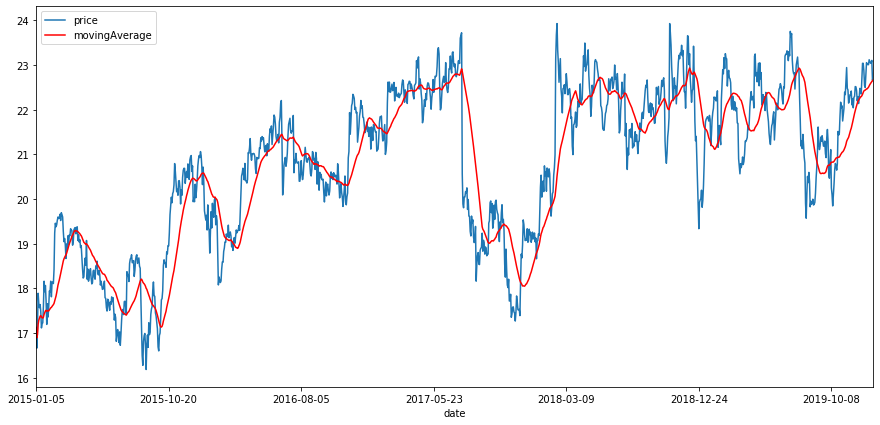

In [2]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets

stocks = df['symbol'].drop_duplicates().tolist()
w = widgets.Dropdown(options=stocks, description='Stock:')
display(w)
df2=df[df['symbol']==stocks[0]]
ax = plt.gca()
df2.plot(kind='line',x='date',y='price',ax=ax,figsize=(15,7))
df2.plot(kind='line',x='date',y='movingAverage',color='red',ax=ax,figsize=(15,7))

def on_change(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(w)
        df2=df[df['symbol']==change['new']]
        ax = plt.gca()
        df2.plot(kind='line',x='date',y='price',ax=ax,figsize=(15,7))
        df2.plot(kind='line',x='date',y='movingAverage',color='red',ax=ax,figsize=(15,7))      

w.observe(on_change)